# Summary 20180716 - 20180720 

This jupyter notebook will serve as a summary to what I've been working on this week. The big takeaway from our meeting last friday was that, becasue Lorentzian's are pathological, the second moment does not give a good estimate of the FWHM of the D-region ISR spectrum. 
I generated the lorentzian spectra at various altitudes using the kudeki equation 

\begin{equation}
	S(f)  \approx \frac{\gamma}{(2\pi f-2\pi f_0)^2+ \gamma^2} 
	\label{eqn:kudeki}
\end{equation} 

where $\gamma = 2k^2D_i$ and $D_i = \frac{K_b T_i}{m_i \nu_i}$.
The big kicker was the plot of second moment vs. 2* gamma as a functiom of altitude for zero doppler shift (shown below), where this relationship appears to be monotonic.

It is important to realize that these spectra were generated using a very simple model of ion collision frequency, and therefore the ion diffusion coefficient (and therefore $ \gamma $) as a function of height. The model is approximated from Beharrel and Honoray 2008 Figure 7, which can be found in this folder or at https://agupubs.onlinelibrary.wiley.com/doi/epdf/10.1029/2007JA012650. My 'model' has $\nu_i$ equal to $10^7 (s^{-1})$ at 65 km and $10^5 (s^{-1})$ at 100 km (incf = np.logspace(7,5,36) is the relevant code). The pre-factor in $D_i$ was given an order of magnitude estimate and thus $\frac{K_b T_i}{m_i} \approx 10^5 $, so $D_i$ was $\frac{10^5}{\nu_i(z)}$ in this simplistic model. 


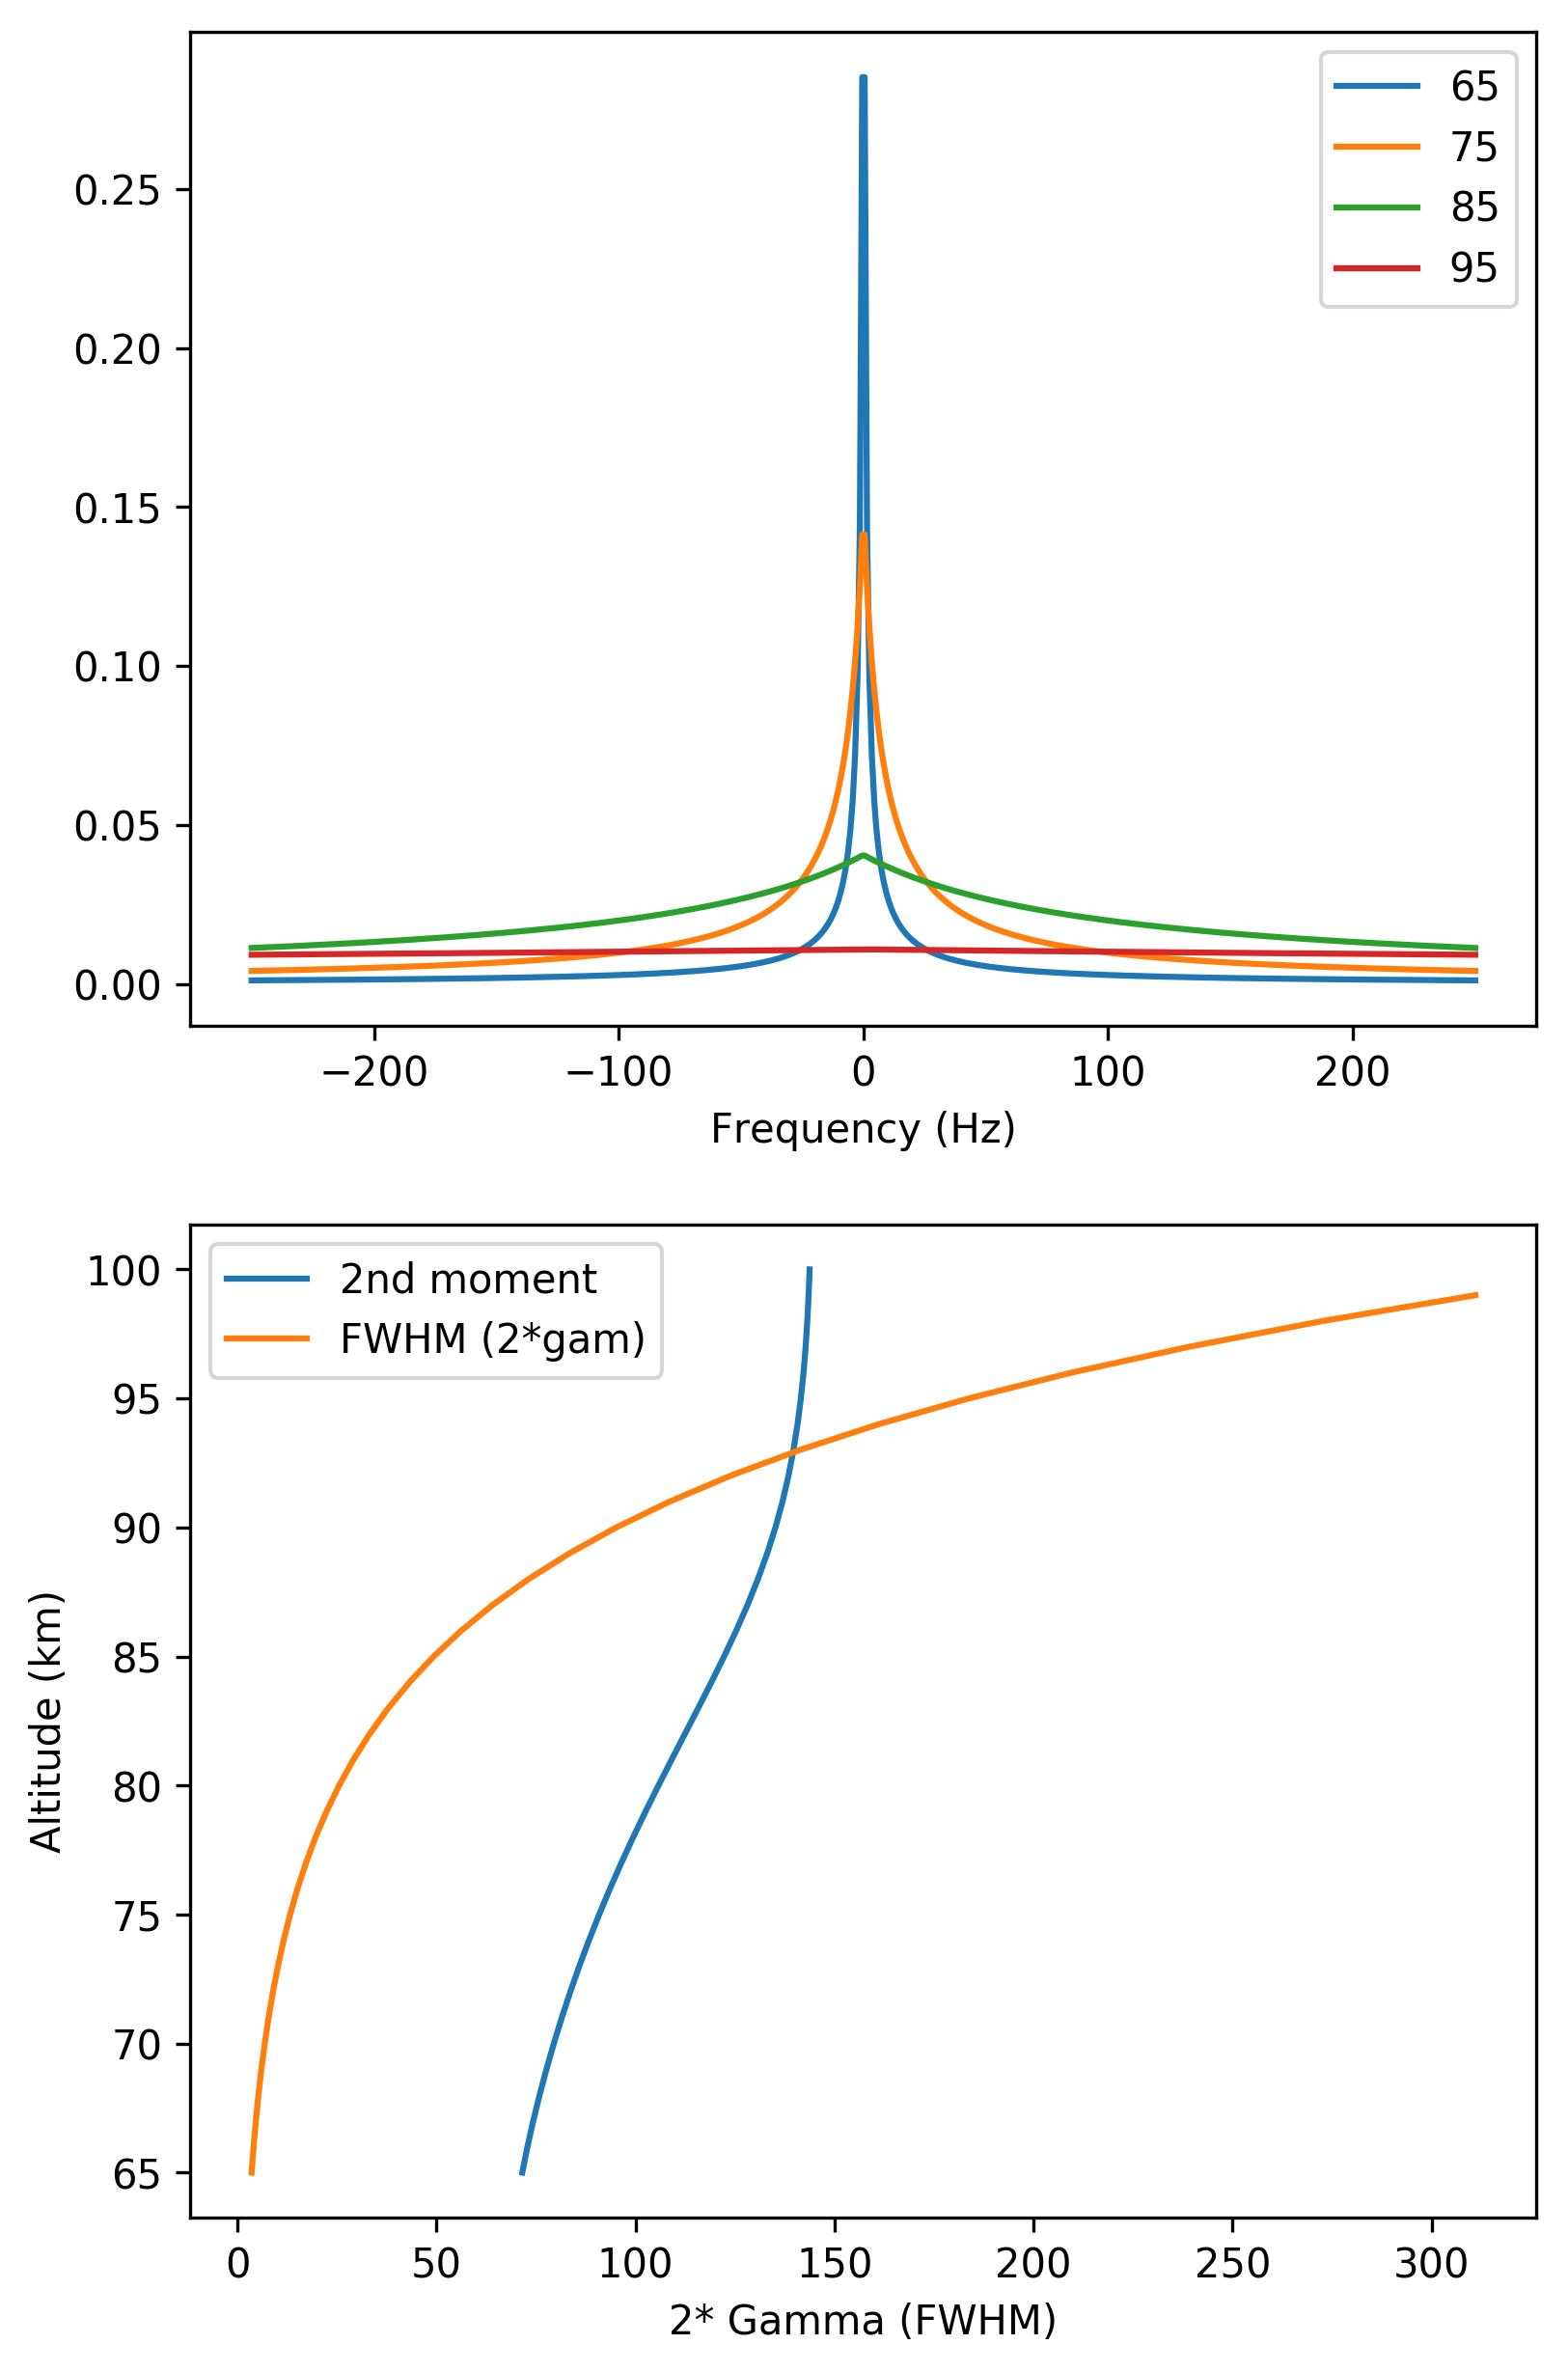

We had the idea of forming a lookup table of second moments vs. gamma and then, given a second moment, interpolate to find the appropriate value of gamma for that spectrum. As we suspected, due to spectral aliasing, the relation between the second moment and gamma changes with varying doppler shift, shown in the top plot of the figure below. 
So now in order for our lookup table to be servicable we need to know the doppler shift accurately so we can pick the proper curve or the curve that describes the proper relationship between second moment and gamma. 

Unfortunately our estimates for the doppler shift have also come from moment calculations... the first moment. The second plot shows the relationship between first moment and gamma for different doppler shifts. Ideally, we would want flat lines, signifying that the first moment only depends on the doppler shift irrespective of gamma and therefore is a perfectly appropraite method in estimating the doppler shift and identifying the proper curve for the second moment gamma relation. This appears to be true for very small doppler shifts, but for shifts > 60 Hz there is a clear decreasing trendline for first moment vs. gamma. 

This may be due to increased spectral aliasing as doppler shift increases or due to Lorentzian's being pathological or both. The point is it now seems we have to add another dimension to our lookup table: first and second moments vs. gamma and doppler shift. 

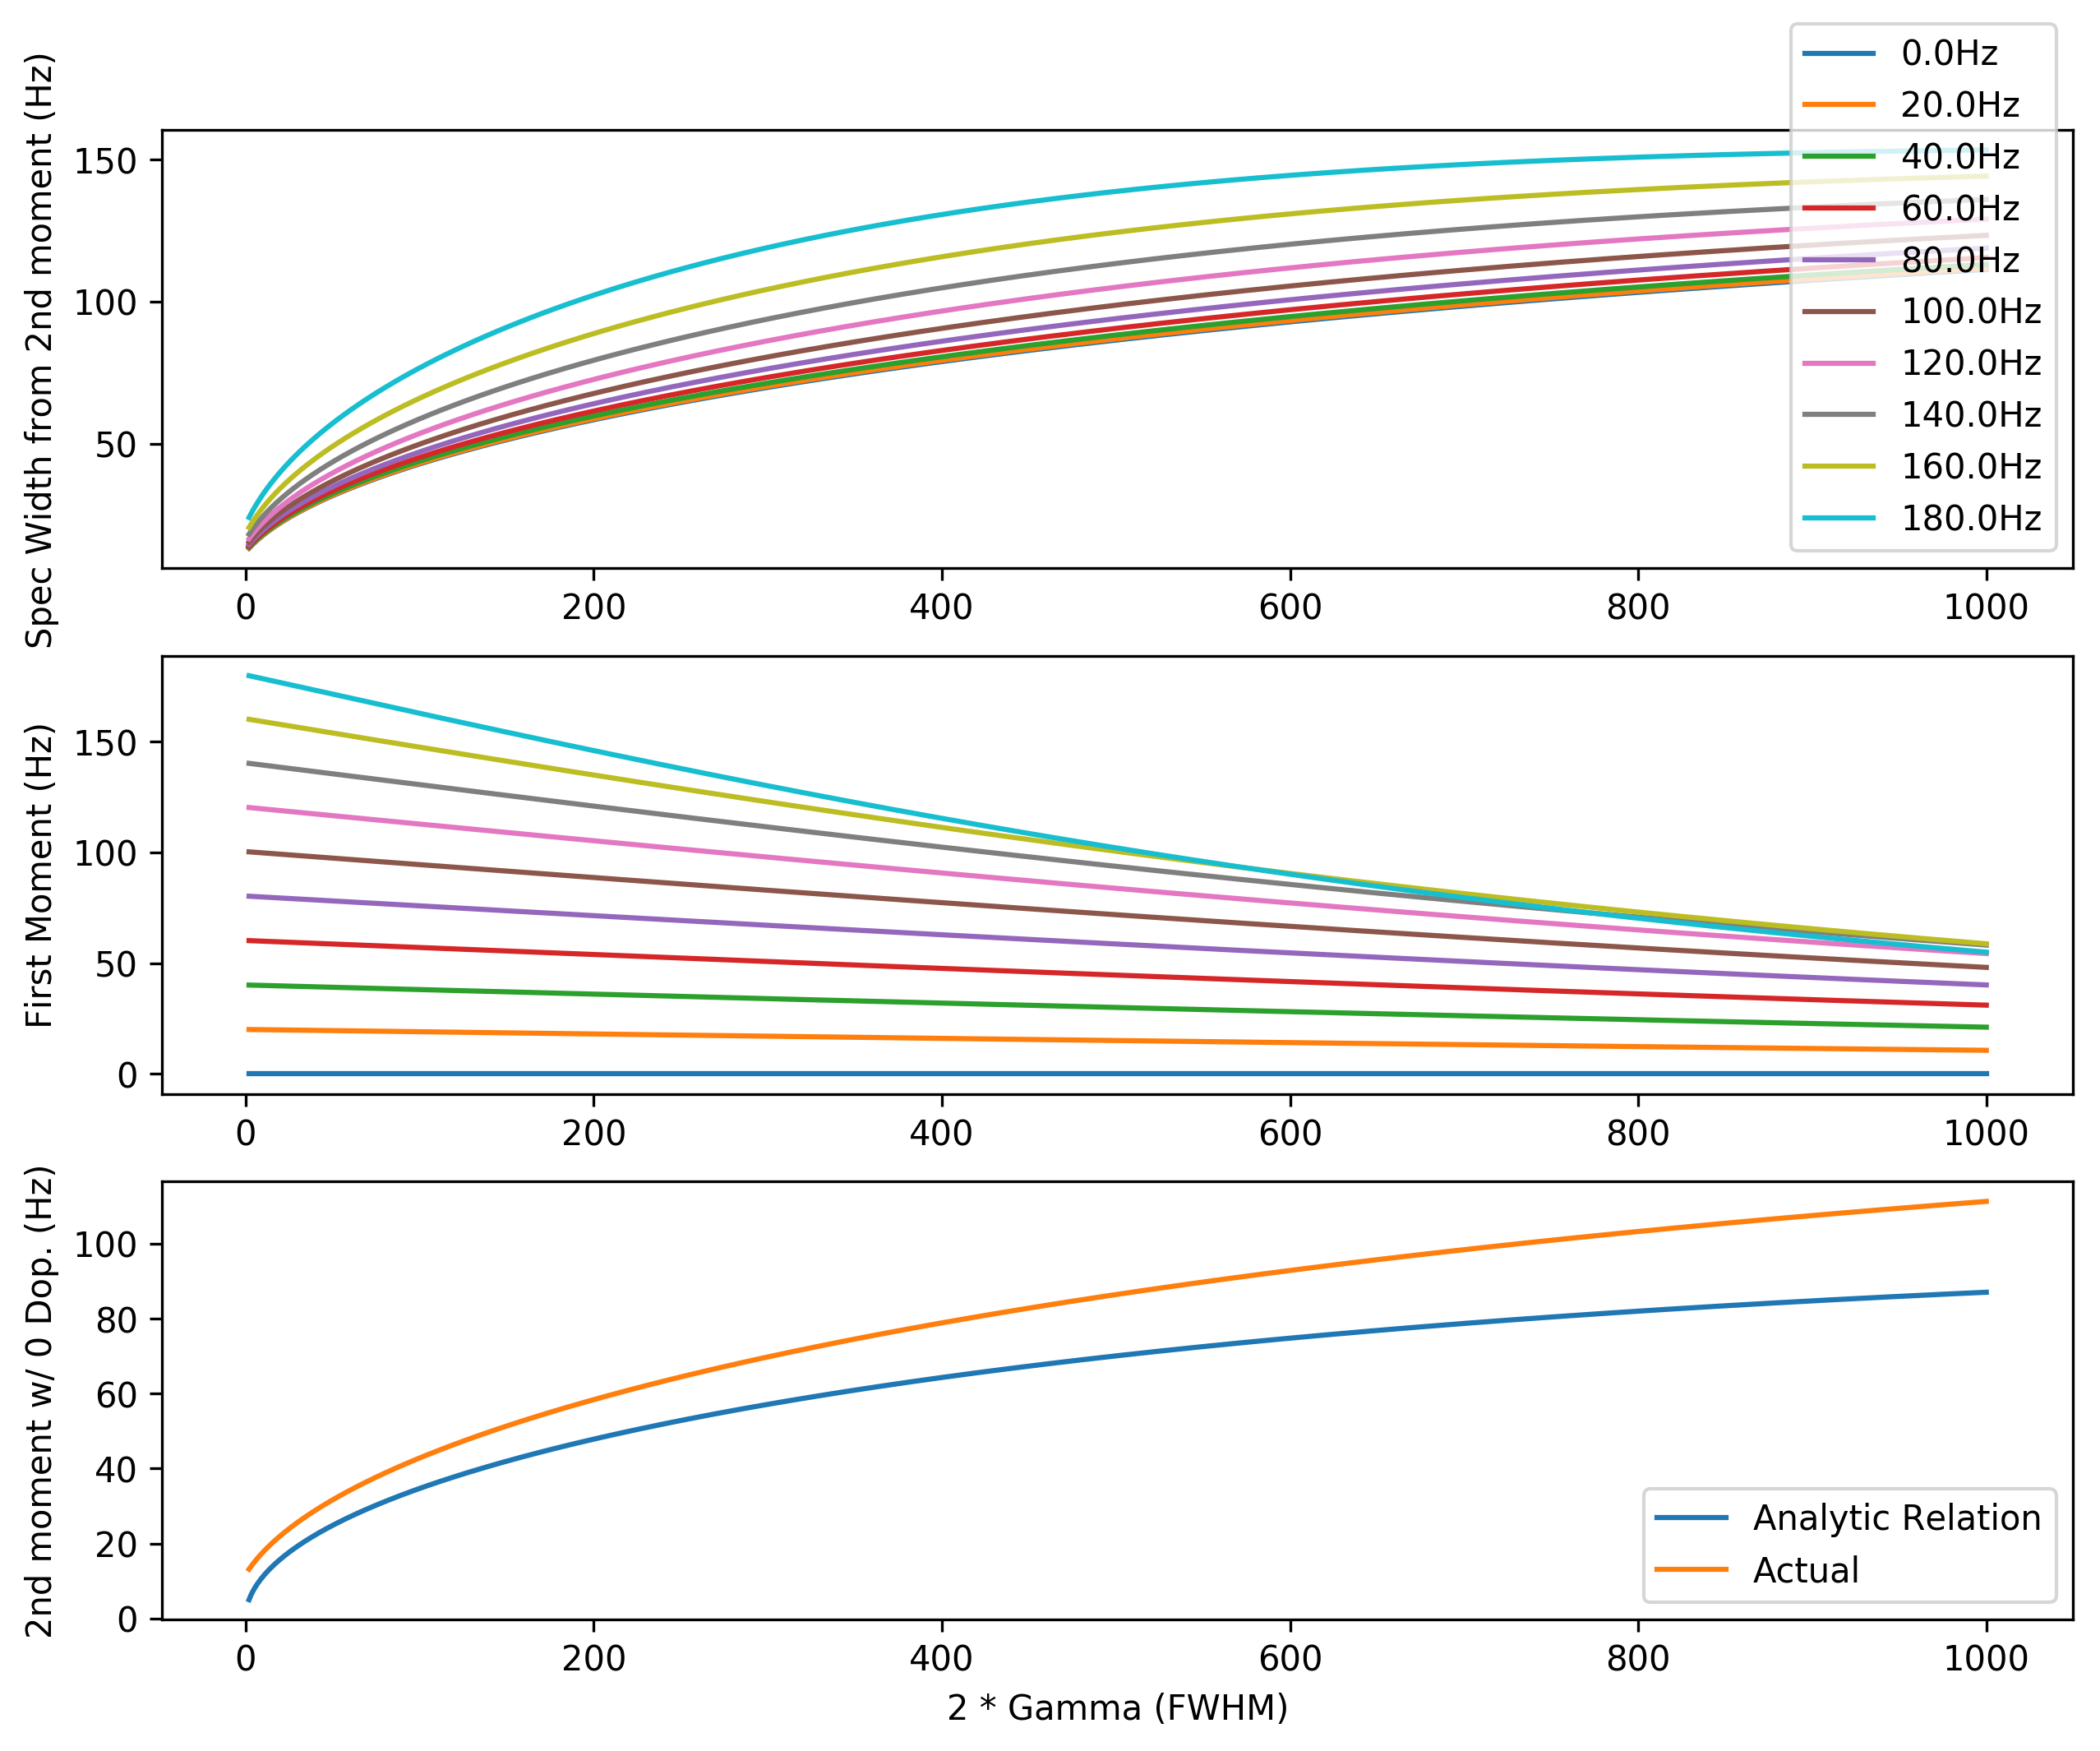

This was an attempt of mine to derive an analytic form of the relation between the second moment and gamma and doppler shift. The bottom plot in the figure above compares the results of the derived analytic relation and the actual calculated relation at 0 doppler shift. 

Note: this derivation is continuous, not discrete, and does not include the triangular window. (Probably why analytic relation doesn't line up with actual)

We start with our acf.
\begin{equation}
	acf  = e^{-\gamma |t| + j (\omega - \omega_o)t} 
\end{equation}    
        
Taking the Fourier transform and converting to angular frequency to frequency we get

\begin{equation}
	S(f) = \frac{2 \gamma}{(2\pi f-2\pi f_0)^2+ \gamma^2}
\end{equation} 

Second moment, integrate over frequency

\begin{equation}
	\bigtriangleup f^2(\gamma ,f_0) = \int_{-f_{max}}^{f_{max}}f^2\frac{2 \gamma}{(2\pi f-2\pi f_0)^2+ \gamma^2}
\end{equation} 

lots of integrals and algebra ......

\begin{equation}
	\bigtriangleup f^2(\gamma ,f_0) = \frac{\gamma (f_{max}-f_0)}{\pi} - \frac{\gamma^2}{2\pi^3} arctan(\frac{2\pi (f_{max}-f_0)}{\gamma}) + \frac{2 f_0^2 }{\pi} arctan(\frac{2\pi (f_{max}-f_0)}{\gamma})
\end{equation} 

And I just realized I neglected to include $(f-f_0)^2$ factor in this derivation so the analytic relation is probably even more complicated !!